In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('auto-mpg.data', sep='\s+', header=None)
data.to_csv('auto-mpg.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


 1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [3]:
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
data.index

RangeIndex(start=0, stop=398, step=1)

In [8]:
# for i in data["horsepower"]:
#     if i == "?":
#         data["horsepower"] = data["horsepower"].replace(i, np.nan)
        

In [9]:
data["horsepower"] = data["horsepower"].replace("?", np.nan)

In [10]:
data['horsepower']=data.horsepower.astype(float)

In [11]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    393 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
for item in data['horsepower']:
    if isinstance(item, str):
        print(item)

In [14]:
h = data["horsepower"]
data['horsepower'] = data['horsepower'].fillna(h.mean())

In [15]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.513995,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.209293,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


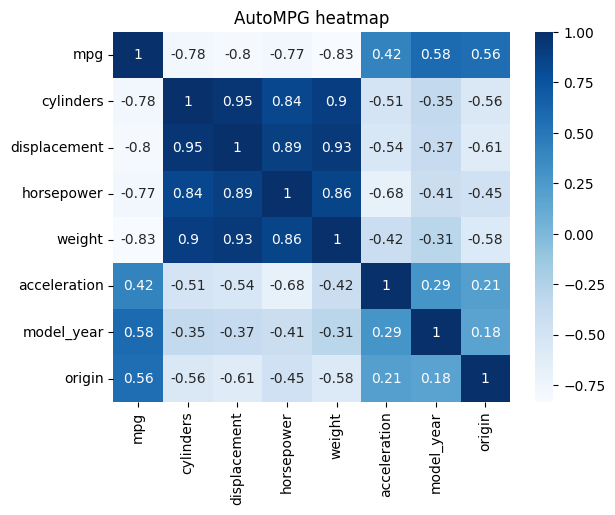

In [16]:
auto = data.drop(['car_name'], axis = 1)
sns.heatmap(auto.corr(), cbar=True, annot=True, cmap='Blues')
plt.title('AutoMPG heatmap')
plt.show()

Positive correlation:
* mpg: acceleration, model_year, origin
* Cylinders: displacement, horsepower, weight

Negative correlation
* mpg: cylinders, displacement, horsepower, weight
* cylinders: acceleration, model_year, origin

We're performing a regression task that predicts the miles per gallon [MPG] of a vehicle.

According to google, MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel. 

MPG is also the primary measurement of a car's fuel efficiency: The higher a car's MPG, the more fuel efficient it is

Exploratory Questions:
1. How does acceleration impact the miles per gallon used by a vehicle? How much does it impact it?
2. Do more recent vehicles use more fuel than older ones?
3. Does the origin of a vehicle impact how much fuel it consumes?
4. In building a vehicle, what is the relationship between the number of cylinders, the horsepower(HP) and the weight of the car

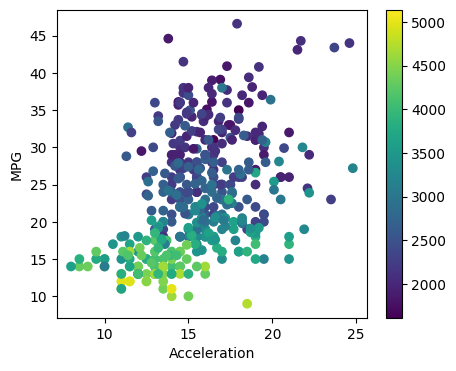

In [17]:
plt.figure(figsize=(5, 4))
plt.scatter(x = 'acceleration', y = 'mpg', c= 'weight', cmap='viridis', data=data)
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.colorbar()
plt.show()

In [18]:
# plt.savefig("scatterplot.png", dpi=300, format="png")

Averagely, as acceleration increases, the number of miles covered per gallon of gas used increases.

Also, lighter cars are faster and more fuel efficient. The reverse is also the case.

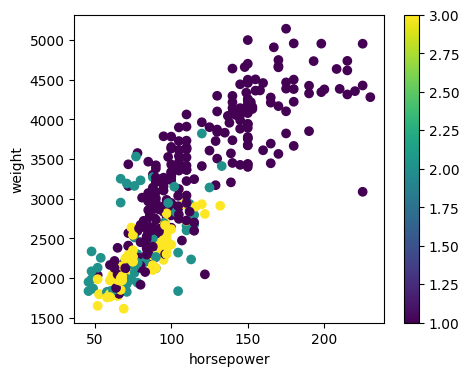

In [19]:
plt.figure(figsize=(5, 4))
plt.scatter(x = 'horsepower', y = 'weight', c= 'origin', cmap='viridis', data=data)
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.colorbar()
plt.show()

Cars of origin 1 generally weighed more and have higher horsepower than origin 2 & 3.

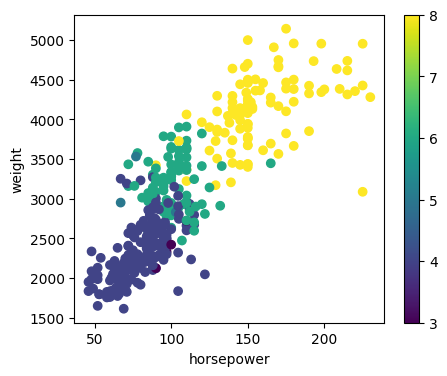

In [20]:
#Relationship between horsepower, weight and cylinder of a vehicle.

plt.figure(figsize=(5, 4))
plt.scatter(x = 'horsepower', y = 'weight', c= 'cylinders', cmap='viridis', data=data)
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.colorbar()
plt.show()

This shows the clear distinction between the 3 variables and how they impact each other, a car/vehicle with more weight and horsepower, generally hhas more cylinders than a vehicle with less weight and smaller horsepower.

### Model

In [21]:
X = data.drop(['mpg', 'car_name'], axis=1)
y = data['mpg']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from  sklearn.tree import DecisionTreeRegressor

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25) 

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model)

LinearRegression()


In [29]:
y_pred = lr_model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [41]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

0.8136273221850783
2.712011013031618
0.12088985690951541


In [39]:
lr_model.score(X_test, y_test)

0.8136273221850783

In [42]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

In [43]:
print(r2_score(y_test, gbr_pred))
print(mean_absolute_error(y_test, gbr_pred))
print(mean_absolute_percentage_error(y_test, gbr_pred))

0.8861039018183406
1.9008073269067267
0.0782136460221055


In [44]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
tree_pred = tree_model.predict(X_test)

In [46]:
print(r2_score(y_test, tree_pred))
print(mean_absolute_error(y_test, tree_pred))
print(mean_absolute_percentage_error(y_test, tree_pred))

0.8002842197224155
2.513
0.10317338488206419


In [59]:
tree2_model = DecisionTreeRegressor(max_depth=30)
tree2_model.fit(X_train, y_train)
tree2_pred = tree2_model.predict(X_test)

In [60]:
print(r2_score(y_test, tree2_pred))
print(mean_absolute_error(y_test, tree2_pred))
print(mean_absolute_percentage_error(y_test, tree2_pred))

0.8428347375569829
2.268
0.09490706549362654


The best performing model is the gradient boosting regressor model, possibly because it is an ensemble model. It performs better than the tuned decision tree regressor.